In [1]:
# Nos immportamos las librerias principales
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#Descargamos la base de datos grande me Málaga, listings.csv.gz
df_Malaga = pd.read_csv("./data/Malaga.csv")

In [7]:
df_Malaga.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,638401413782978130,https://www.airbnb.com/rooms/638401413782978130,20240630141205,2024-07-01,city scrape,Capitán - Apartamento en el centro de Málaga,Magnificent apartment in the heart of Malaga w...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,382146507,...,4.95,4.98,4.85,VFT/MA/52526,t,63,63,0,0,3.99
1,593807685540946920,https://www.airbnb.com/rooms/593807685540946920,20240630141205,2024-07-01,city scrape,"Balcón Victoria, 4 bedrooms with balcony in th...","Balcón Victoria, 4 rooms in Historic Center. I...",NaN,https://a0.muscache.com/pictures/prohost-api/H...,11733642,...,4.92,4.83,4.67,VFT/MA/45175,t,20,20,0,0,0.46
2,689209787389564671,https://www.airbnb.com/rooms/689209787389564671,20240630141205,2024-07-01,city scrape,"Lovely spacious 2 bedroom, 2 bathroom with ter...","Set in the perfect location, this stylish, com...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,13967638,...,4.64,4.73,4.55,CTC-2017080773,f,2,1,1,0,0.60
3,1169368107504912867,https://www.airbnb.com/rooms/1169368107504912867,20240630141205,2024-07-01,city scrape,Cathedral Penthouse with Terrace,Enjoy the cathedral from the terrace or living...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,4884962,...,NaN,NaN,NaN,VUT/MA/63833,t,17,17,0,0,NaN
4,53218911,https://www.airbnb.com/rooms/53218911,20240630141205,2024-06-30,city scrape,excelente estudio cerca del Carrefour,NaN,NaN,https://a0.muscache.com/pictures/d60ac57b-d9fb...,413971511,...,4.65,3.24,3.12,Exempt,t,4,4,0,0,0.53


In [4]:
# Vemos como quedan los datos en el dataframe visualmente, los nulos, las columnas, etc
df_Malaga.describe()
# vemos que en caso de usarla habrá que eliminar muchas columnas y algunas filas, pero aun así quedarán muchos registros con los que trabajar

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,8.976000e+03,8.976000e+03,8.976000e+03,8976.000000,8976.000000,0.0,8976.000000,8976.000000,8976.000000,8650.000000,...,7756.000000,7756.000000,7756.000000,7756.000000,7756.000000,8976.000000,8976.000000,8976.000000,8976.000000,7763.000000
mean,5.217140e+17,2.024063e+13,1.979661e+08,40.627897,56.951760,NaN,36.720254,-4.421389,4.053587,1.310694,...,4.682851,4.760128,4.783397,4.712527,4.586412,22.613191,21.033868,1.569630,0.008356,1.525055
std,4.748903e+17,0.000000e+00,1.797676e+08,94.893435,160.524854,NaN,0.013847,0.024977,2.206075,0.679784,...,0.396906,0.353093,0.349010,0.359509,0.430813,37.965137,37.691198,4.969394,0.178003,1.572874
min,9.603300e+04,2.024063e+13,4.555300e+04,1.000000,1.000000,NaN,36.646012,-4.584345,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.774567e+07,2.024063e+13,4.102521e+07,2.000000,2.000000,NaN,36.718080,-4.429416,2.000000,1.000000,...,4.570000,4.690000,4.730000,4.600000,4.490000,1.000000,1.000000,0.000000,0.000000,0.380000
50%,6.561254e+17,2.024063e+13,1.307236e+08,7.000000,8.000000,NaN,36.722164,-4.422601,4.000000,1.000000,...,4.790000,4.860000,4.890000,4.800000,4.680000,5.000000,4.000000,0.000000,0.000000,1.000000
75%,9.650197e+17,2.024063e+13,3.292660e+08,45.000000,54.000000,NaN,36.725268,-4.417434,5.000000,1.500000,...,4.940000,4.970000,5.000000,4.950000,4.830000,26.000000,25.000000,0.000000,0.000000,2.140000
max,1.189767e+18,2.024063e+13,5.864050e+08,2632.000000,6437.000000,NaN,36.875649,-4.278520,16.000000,11.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,194.000000,194.000000,37.000000,6.000000,13.550000


In [5]:
# Descargamos y vemos la composción de la base de datos corta, listings.csv para la ciudad de Málaga.
df_Malaga_2 = pd.read_csv("./data/Malaga_2.csv")

In [6]:
df_Malaga_2.describe()
# Vemos que contiene algunos campos interesantes, pero muchos menos que la base datos más grande. 
# Intentaremos trabajar con la grande a ver si es manejable. Si no usaremos esta aunque ofrezca menos información.

,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,8.186000e+03,0.0,8186.000000,8186.000000,7827.000000,8186.000000,8186.000000,7075.000000,8186.000000,8186.000000,8186.000000
mean,1.973418e+08,NaN,36.720297,-4.421390,157.217963,2.968238,41.889934,1.521791,23.917542,190.426215,12.832030
std,1.794768e+08,NaN,0.013461,0.024411,299.511795,12.453622,72.827224,1.576455,38.990539,113.015004,18.108875
min,4.555300e+04,NaN,36.646012,-4.582370,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,4.145094e+07,NaN,36.718148,-4.429318,89.000000,1.000000,3.000000,0.380000,2.000000,88.000000,1.000000
50%,1.281880e+08,NaN,36.722158,-4.422588,119.000000,2.000000,13.000000,1.000000,6.000000,198.000000,5.000000
75%,3.292660e+08,NaN,36.725265,-4.417492,167.000000,3.000000,48.000000,2.140000,29.000000,293.000000,18.000000
max,5.864050e+08,NaN,36.875440,-4.278520,12099.000000,699.000000,906.000000,13.550000,194.000000,365.000000,182.000000


In [6]:
df_Malaga_2.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license;
0,"96033,""Bonito piso a 200m de la playa, El Palo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,166473,Perfect Location In Malaga,793360.0,Fred,NaN,Este,36.720310,-4.361080,Private room,29.0,5.0,98.0,2024-06-24,0.63,5.0,147.0,9.0,;
2,330760,Malaga Lodge Guesthouse Double room-shared bath.,1687526.0,Mayte,NaN,Centro,36.729786,-4.413462,Private room,64.0,1.0,56.0,2024-06-16,0.37,6.0,104.0,6.0,VFT/MA/12240;


In [25]:
# Veamos el tipo de datos
df_Malaga_2.dtypes
# Parecen bastante bien definidos, con muchos datos float64 que permiten cálculos numéricos.

id                                 object
name                               object
host_id                           float64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license;                           object
dtype: object

In [9]:
df_Malaga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8976 entries, 0 to 8975
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8976 non-null   int64  
 1   listing_url                                   8976 non-null   object 
 2   scrape_id                                     8976 non-null   int64  
 3   last_scraped                                  8976 non-null   object 
 4   source                                        8976 non-null   object 
 5   name                                          8976 non-null   object 
 6   description                                   8714 non-null   object 
 7   neighborhood_overview                         4420 non-null   object 
 8   picture_url                                   8976 non-null   object 
 9   host_id                                       8976 non-null   i

In [8]:
# hemos visto que el campo precio que es importante tiene el simbolo del $ delante por lo que probamos a sumarlo pero creemos que no podrá por no ser un dato numérico.
df_Malaga_suma = df_Malaga['price'].sum()

TypeError: can only concatenate str (not "int") to str

In [15]:
#Hacemos una copia de los datos de Malaga para probar a transformar el campo price para poder usarlo como variable numérica
df_Malaga_prueba = df_Malaga.copy()

df_Malaga_prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8976 entries, 0 to 8975
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8976 non-null   int64  
 1   listing_url                                   8976 non-null   object 
 2   scrape_id                                     8976 non-null   int64  
 3   last_scraped                                  8976 non-null   object 
 4   source                                        8976 non-null   object 
 5   name                                          8976 non-null   object 
 6   description                                   8714 non-null   object 
 7   neighborhood_overview                         4420 non-null   object 
 8   picture_url                                   8976 non-null   object 
 9   host_id                                       8976 non-null   i

In [16]:
# transformamos el campo 'price' quitándole el simblo $ 
df_Malaga_prueba['price'] = pd.to_numeric(df_Malaga_prueba['price'].str.replace('$', ''), errors='coerce')

In [17]:
# probamos a sumarlo a ver si funciona
suma_prueba = df_Malaga_prueba['price'].sum()
print(suma_prueba)
# Parece que sí funciona. Haremos lo mismo cuando tratemos los datos con las tres ciudades o con la agrupación.

1204905.0


In [18]:
# Echemos un ojo a los datos de Valencia y Mallorca a ver si son como los de Málaga.
df_Valencia = pd.read_csv("./data/Valencia.csv")
df_Mallorca = pd.read_csv("./data/Mallorca.csv")

In [8]:
df_Valencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9596 entries, 0 to 9595
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9596 non-null   int64  
 1   listing_url                                   9596 non-null   object 
 2   scrape_id                                     9596 non-null   int64  
 3   last_scraped                                  9596 non-null   object 
 4   source                                        9596 non-null   object 
 5   name                                          9596 non-null   object 
 6   description                                   9302 non-null   object 
 7   neighborhood_overview                         4728 non-null   object 
 8   picture_url                                   9596 non-null   object 
 9   host_id                                       9596 non-null   i

In [5]:
df_Valencia.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,9.596000e+03,9.596000e+03,9.596000e+03,9596.000000,9596.000000,9596.000000,9596.000000,9596.000000,9078.000000,9421.000000,...,7796.000000,7796.000000,7796.000000,7796.000000,7796.000000,9596.000000,9596.000000,9596.000000,9596.000000,7801.000000
mean,6.353315e+17,2.024062e+13,2.491254e+08,19.308879,25.341080,39.467505,-0.363516,3.483639,1.294503,1.630506,...,4.649738,4.789212,4.792640,4.682028,4.558380,13.553772,12.220092,1.308774,0.018028,1.831073
std,4.740290e+17,0.000000e+00,2.013337e+08,61.998842,115.228716,0.021983,0.023293,1.960911,0.571282,1.140957,...,0.437254,0.337401,0.366995,0.369550,0.453025,28.968555,29.210717,3.140352,0.266973,1.675302
min,4.815400e+04,2.024062e+13,5.947000e+03,1.000000,1.000000,39.279116,-0.426282,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,4.335199e+07,2.024062e+13,5.865364e+07,1.000000,2.000000,39.462440,-0.379762,2.000000,1.000000,1.000000,...,4.500000,4.740000,4.750000,4.560000,4.430000,1.000000,1.000000,0.000000,0.000000,0.530000
50%,8.425802e+17,2.024062e+13,1.895266e+08,3.000000,4.000000,39.469370,-0.370905,3.000000,1.000000,1.000000,...,4.760000,4.880000,4.900000,4.770000,4.670000,3.000000,1.000000,0.000000,0.000000,1.300000
75%,1.071721e+18,2.024062e+13,4.561352e+08,12.000000,16.000000,39.475485,-0.343460,4.000000,1.500000,2.000000,...,4.930000,4.980000,5.000000,4.930000,4.820000,9.000000,7.000000,1.000000,0.000000,2.700000
max,1.184465e+18,2.024062e+13,5.848199e+08,2616.000000,6382.000000,39.547770,-0.276100,16.000000,11.500000,17.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,151.000000,151.000000,21.000000,8.000000,12.210000


In [19]:
# Veamos otro dato como la última fecha 
print(df_Valencia.last_scraped.max())
print(df_Valencia.last_scraped.min())

2024-06-23
2024-06-22


In [20]:
df_Mallorca.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.721500e+04,1.721500e+04,1.721500e+04,17215.000000,17215.000000,0.0,17215.000000,17215.000000,17215.000000,16645.000000,...,12865.000000,12866.000000,12866.000000,12866.000000,12866.000000,17215.000000,17215.000000,17215.000000,17215.000000,12877.000000
mean,3.774546e+17,2.024062e+13,1.863381e+08,190.094859,351.967006,NaN,39.661497,3.004109,5.704270,2.280024,...,4.673217,4.795295,4.763062,4.700462,4.561901,88.265060,87.751612,0.479349,0.002033,0.714155
std,4.663568e+17,0.000000e+00,1.759791e+08,369.832507,698.108249,NaN,0.173239,0.238443,2.696312,1.361370,...,0.439292,0.381905,0.411427,0.367573,0.473123,184.989906,184.528035,1.446590,0.078815,1.172582
min,6.999800e+04,2.024062e+13,1.865100e+04,1.000000,1.000000,NaN,39.302070,2.347260,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.500221e+07,2.024062e+13,4.606409e+07,2.000000,3.000000,NaN,39.538649,2.867009,4.000000,1.000000,...,4.530000,4.750000,4.690000,4.570000,4.430000,2.000000,1.000000,0.000000,0.000000,0.160000
50%,4.955998e+07,2.024062e+13,1.172772e+08,22.000000,37.000000,NaN,39.682930,3.053163,6.000000,2.000000,...,4.810000,4.920000,4.910000,4.800000,4.670000,17.000000,17.000000,0.000000,0.000000,0.400000
75%,8.685800e+17,2.024062e+13,2.874377e+08,188.000000,293.000000,NaN,39.820240,3.145586,8.000000,3.000000,...,5.000000,5.000000,5.000000,4.980000,4.850000,89.000000,89.000000,0.000000,0.000000,0.890000
max,1.181959e+18,2.024062e+13,5.836710e+08,5304.000000,9622.000000,NaN,39.929900,3.474510,16.000000,19.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,849.000000,846.000000,18.000000,4.000000,45.000000


In [ ]:
# Parece que las tres ciudades tienen los mismos datos y de los mismos tipos por lo que podremos procesarlas de igual manera.

In [21]:
df_Mallorca_prueba = df_Malaga.copy()
df_Valencia_prueba = df_Valencia.copy()



In [22]:
df_Valencia_prueba['price'] = pd.to_numeric(df_Valencia_prueba['price'].str.replace('$', ''), errors='coerce')
df_Mallorca_prueba['price'] = pd.to_numeric(df_Mallorca_prueba['price'].str.replace('$', ''), errors='coerce')

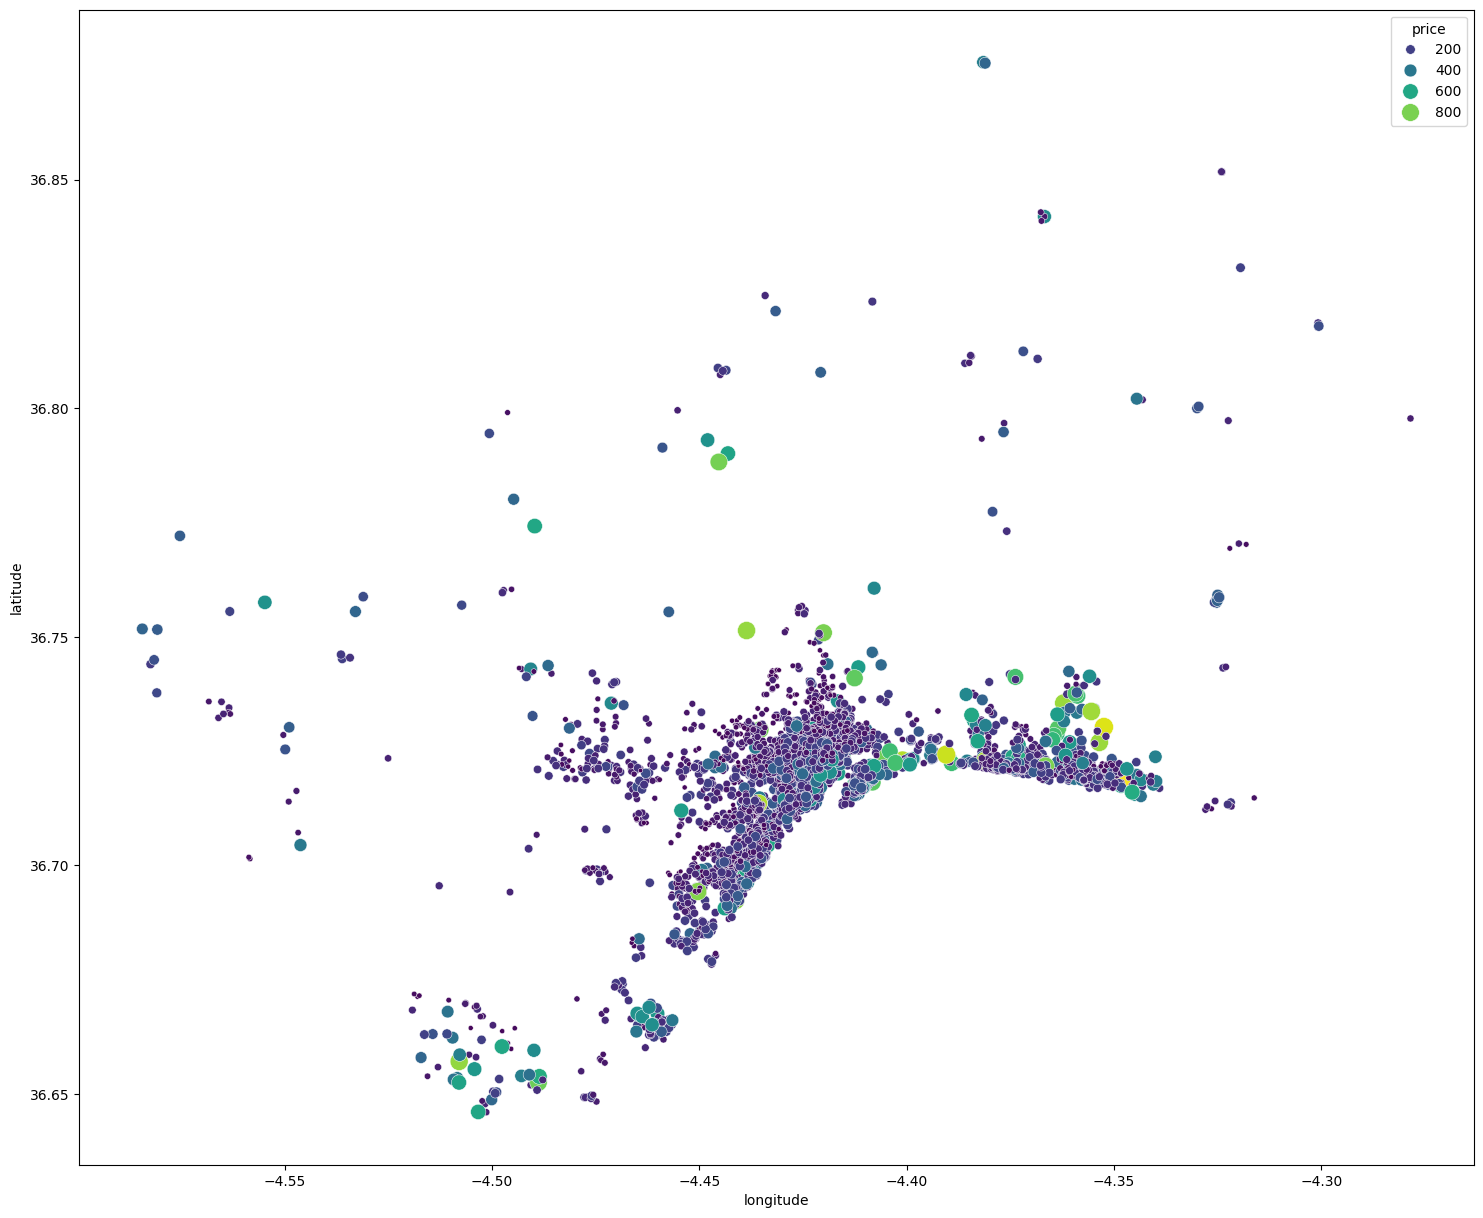

In [34]:
# Vamos a tratar de procesar gráficamente por ejemplo los datos de Málaga, para ver si da algún error una vez que hemos transformado arriba el precio para convertirlo en numério.
fig = plt.figure(figsize=(18,15))


sns.scatterplot(x='longitude', y='latitude', size = df_Malaga_prueba["price"], sizes = (10,200),data = df_Malaga_prueba,hue= "price",palette='viridis',color=df_Malaga_prueba.price);


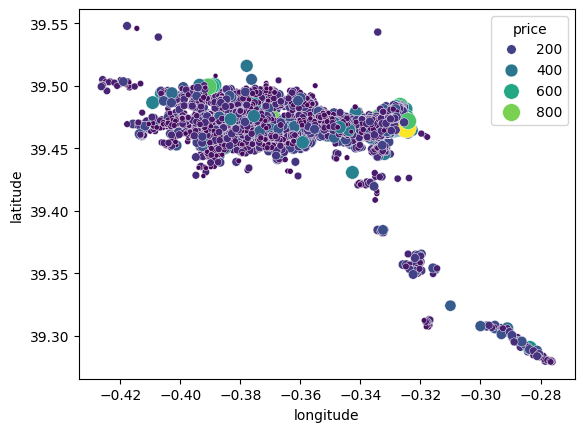

In [33]:

sns.scatterplot(x='longitude', y='latitude', size = df_Valencia_prueba["price"], sizes = (10,200),data = df_Valencia_prueba,hue= "price",palette='viridis',color=df_Valencia_prueba.price);



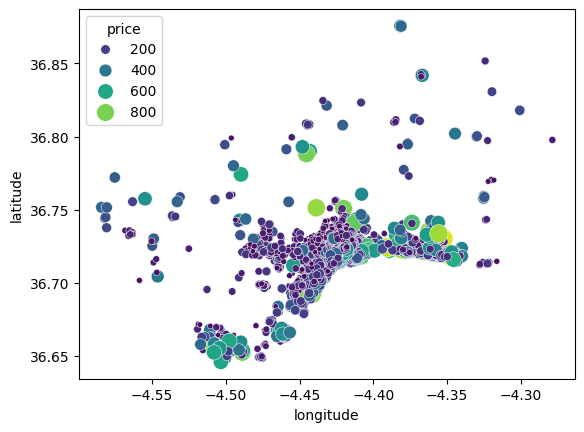

In [35]:

sns.scatterplot(x='longitude', y='latitude', size = df_Mallorca_prueba["price"], sizes = (10,200),data = df_Mallorca_prueba,hue= "price",palette='viridis',color=df_Mallorca_prueba.price);


In [37]:
df_Malaga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8976 entries, 0 to 8975
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8976 non-null   int64  
 1   listing_url                                   8976 non-null   object 
 2   scrape_id                                     8976 non-null   int64  
 3   last_scraped                                  8976 non-null   object 
 4   source                                        8976 non-null   object 
 5   name                                          8976 non-null   object 
 6   description                                   8714 non-null   object 
 7   neighborhood_overview                         4420 non-null   object 
 8   picture_url                                   8976 non-null   object 
 9   host_id                                       8976 non-null   i

In [34]:
df_Mallorca.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17215 entries, 0 to 17214
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            17215 non-null  int64  
 1   listing_url                                   17215 non-null  object 
 2   scrape_id                                     17215 non-null  int64  
 3   last_scraped                                  17215 non-null  object 
 4   source                                        17215 non-null  object 
 5   name                                          17215 non-null  object 
 6   description                                   16631 non-null  object 
 7   neighborhood_overview                         6665 non-null   object 
 8   picture_url                                   17215 non-null  object 
 9   host_id                                       17215 non-null 

In [25]:
df_2.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [14]:
df_Valencia.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,48154,https://www.airbnb.com/rooms/48154,20240622134440,2024-06-22,city scrape,Precioso apartamento con wifi,Second floor on a farm from the late 19th cent...,Very close neighborhood to the city's old town...,https://a0.muscache.com/pictures/1109085/9c0d4...,219476,...,4.78,4.49,4.52,VT-41540-V,f,4,4,0,0,0.97
1,136378,https://www.airbnb.com/rooms/136378,20240622134440,2024-06-23,city scrape,Old City Charm with Modern Comfort,NaN,NaN,https://a0.muscache.com/pictures/pro_photo_too...,591197,...,4.80,4.84,4.56,VT-42161-V,f,2,2,0,0,0.16
2,149715,https://www.airbnb.com/rooms/149715,20240622134440,2024-06-23,city scrape,1900 Style Valencian Beach Home for 10px,Typical town house with 5 bedrooms and 3 and a...,"Surrounded by historic houses, authentic res...",https://a0.muscache.com/pictures/7507244a-87d8...,5947,...,4.89,4.59,4.62,Nº TURISMO VT36469V CATEGORIA: standard,f,1,1,0,0,1.65
3,165971,https://www.airbnb.com/rooms/165971,20240622134440,2024-06-22,city scrape,★ Architectural touch! ★,"Hola! I am ready to welcome you in my apt., wh...",Just outside the old city centre (one block aw...,https://a0.muscache.com/pictures/10878830/ade6...,791187,...,4.87,4.83,4.84,VT-32757-V,t,7,7,0,0,3.29
4,182221,https://www.airbnb.com/rooms/182221,20240622134440,2024-06-23,city scrape,Apartments Calatrava City Valencia,NaN,NaN,https://a0.muscache.com/pictures/1161513/9f7ac...,1315567,...,4.63,4.25,4.38,VT-38755-V,f,2,2,0,0,0.07
